<b>random forest regressor</b> <br>
OOB Score: 0.9806250796856056 <br>
R-Squared on test: 0.9974039392381283<br>
MSE: 0.01903015436936935
   
   
OLS Linear Regression on cost per watt
R-Squared score = 0.937

OLS Linear Regression on weekly differences
OLS Regression Results
R-squared:    0.000


In [37]:
cd ..

/Users/jenniferpaige/getit/Solar


In [38]:
from src import Prep
from src.Time_Series_Helper_Funcs import *
import matplotlib.pyplot as plt
from src.Regression_Helper_Funcs import *

import warnings
warnings.filterwarnings('ignore')

In [39]:
cd PREV/

/Users/jenniferpaige/getit/Solar/PREV


In [26]:
%load_ext autoreload

In [27]:
%reload_ext autoreload

In [28]:
%autoreload

In [29]:
df = Prep.prep()

1 of 11 |    Reading in first dataset. 
             Using 4/60 features/columns: 'Installation Date', 'System Size', 'Total Installed Price' , 'Customer Segment' 
             Changing -9999 values to null
Elapsed time is 32.891969 seconds.
2 of 11 |    Reading in second dataset. 
             Using 4/60 features/columns: 'Installation Date', 'System Size', 'Total Installed Price' , 'Customer Segment' 
             Changing -9999 values to null
Elapsed time is 2.451299 seconds.
3 of 11 |    Concatenating datasets together
4 of 11 |    Refining to only RES Customer Segment
5 of 11 |    Cleaning up column names
6 of 11 |    Sorting values by installation_date
7 of 11 |    Assigning installation_date as index
8 of 11 |    Replacing all null values with median values from same year
9 of 11 |    Adusting prices for inflation
Elapsed time is 49.709220 seconds.
10 of 11|    Creating target variable: cost_per_watt
11 of 11|    Removing > 1600 outliers above $25 per watt
Prep complete 
 ------

## SHORTEND TIMELINE 

In [33]:
y = time_frame(df)

In [40]:
ols_model, ols_trend = lag_ols_model(y)[0], lag_ols_model(y)[1]
linear_model, linear_trend = linear_ols_model(y)[0], linear_ols_model(y)[1]
rf_model, rf_trend = randomforest_model(y)[0], randomforest_model(y)[1]
score_table(y, ols_model, linear_model, rf_model)

MAE       MSE      RMSE
Models                              
OLS     0.189762  0.120843  0.347625
LINEAR  0.555970  0.555970  0.745634
RF      0.074146  0.021341  0.146086

In [ ]:
compute_autocorrelation(s_lagg)

In [180]:
simple_move(y)

cost_1weekago [
 MAE: 0.05 
 MSE: 0.0 
 RMSE: 0.07 ]
cost_3weeksago [
 MAE: 0.07 
 MSE: 0.01 
 RMSE: 0.09 ]
None None


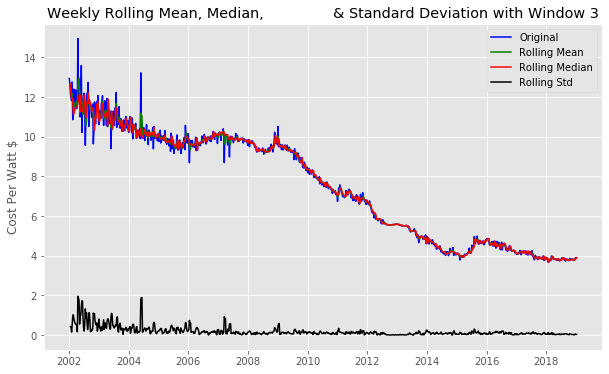

Results of Dickey-Fuller Test:
Test Statistic                  -1.323589
p-value                          0.618312
#Lags Used                      21.000000
Number of Observations Used    866.000000
Critical Value (1%)             -3.437924
Critical Value (5%)             -2.864883
Critical Value (10%)            -2.568550
dtype: float64


In [42]:
rolling_plot(y)
dfuller_test(y)

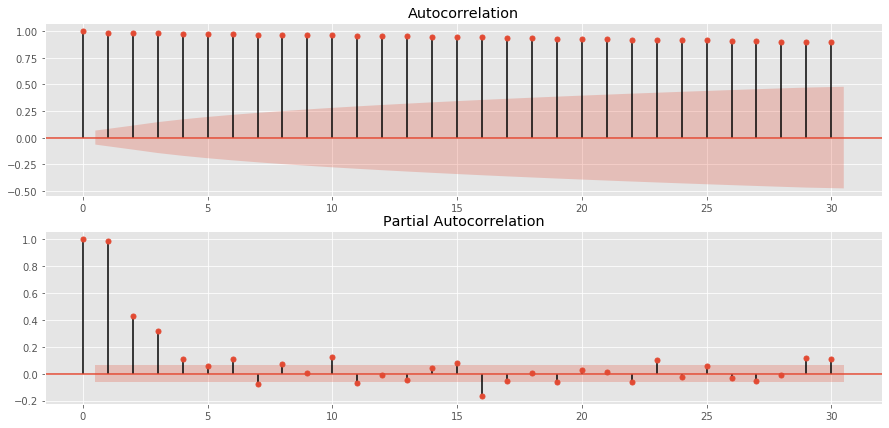

In [43]:
autocor_plots(y)

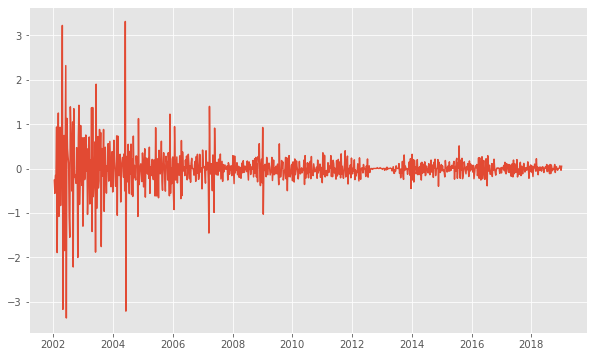

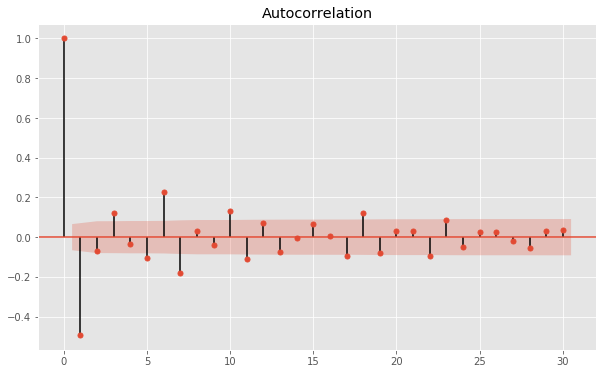

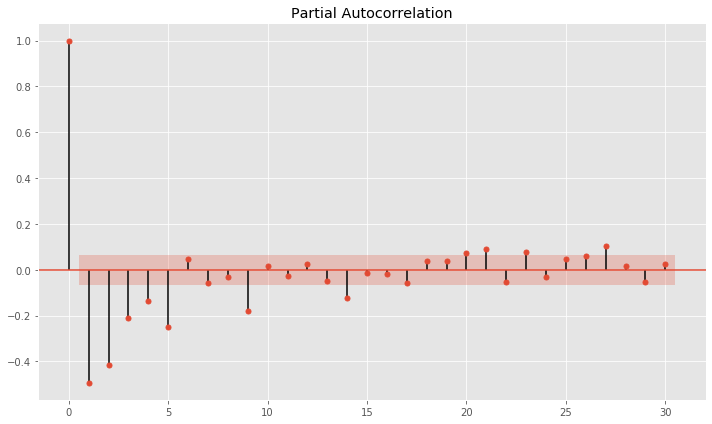

In [44]:
#shortened timeline 
diff = get_differences(y)

In [45]:
test_for_stationarity(diff)

ADF p-value: 0.00
Achieved stationarity! Reject ADF H0.


In [46]:
#ORIGINAL REGRESSION
ols_model, ols_trend = lag_ols_model(y)[0], lag_ols_model(y)[1]
linear_model, linear_trend = linear_ols_model(y)[0], linear_ols_model(y)[1]
rf_model, rf_trend = randomforest_model(y)[0], randomforest_model(y)[1]
print('Regression Models on original data')
score_table(y, ols_model, linear_model, rf_model)


Regression Models on original data


MAE       MSE      RMSE
Models                              
OLS     0.189762  0.120843  0.347625
LINEAR  0.555970  0.555970  0.745634
RF      0.072495  0.019823  0.140796

In [47]:
# RUN STATIONARY DATA THROUGH ORIGINAL REGRESSION
tsols_model, tsols_trend = stat_lag_ols_model(diff)[0], stat_lag_ols_model(diff)[1]
tslinear_model, tslinear_trend = stat_linear_ols_model(diff)[0], stat_linear_ols_model(diff)[1]
tsrf_model, tsrf_trend = stat_randomforest_model(diff)[0], stat_randomforest_model(diff)[1]
print('Regression Models on differenced stationary data')
stat_score_table(diff, tsols_model, tslinear_model, tsrf_model)

Regression Models on differenced stationary data


MAE       MSE      RMSE
Models                              
OLS     0.184800  0.115255  0.339493
LINEAR  0.227956  0.227956  0.477447
RF      0.126722  0.061356  0.247701

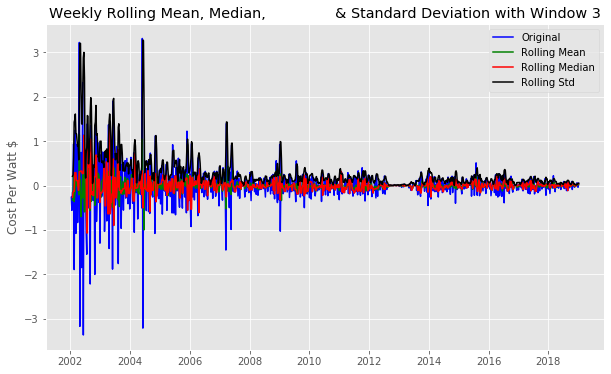

Results of Dickey-Fuller Test:
Test Statistic                -6.775243e+00
p-value                        2.580703e-09
#Lags Used                     2.100000e+01
Number of Observations Used    8.650000e+02
Critical Value (1%)           -3.437932e+00
Critical Value (5%)           -2.864887e+00
Critical Value (10%)          -2.568552e+00
dtype: float64


In [48]:
rolling_plot(diff[1:])
dfuller_test(diff[1:])

<function matplotlib.pyplot.show(*args, **kw)>

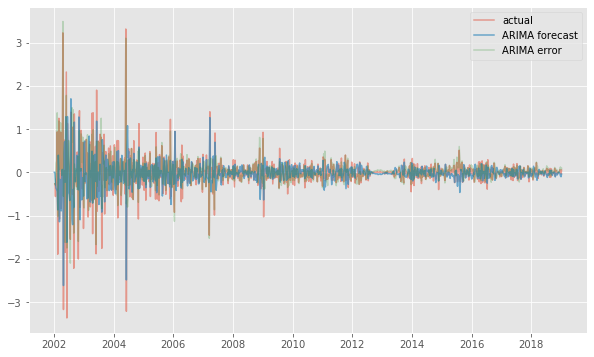

In [49]:
arima_forecast = pd.DataFrame(ARIMA(diff, order=(4,1,1), missing='drop', dates=diff.index.date, freq='W',).fit().predict())
arima_diff = diff.copy()
arima_diff['arima_preds'] = arima_forecast
arima_diff['error'] = arima_diff['cost_per_watt'] - arima_diff['arima_preds']
plt.plot(diff, alpha=0.5, label= 'actual')
plt.plot(arima_forecast, label='ARIMA forecast', alpha=0.7)
plt.plot(arima_diff['error'], label='ARIMA error', alpha=0.2, color='green')
plt.legend(loc='best')
plt.show

In [ ]:
w_diff = weekly_differences.dropna()

s_lagg_cost = create_lag(weekly_differences)

compute_autocorrelation(s_lagg_cost)

plot_ac_scat(w_diff)

s_linear_model, s_linear_trend = linear_model_trend(syw)[0], linear_model_trend(syw)[1]

s_linear_model, s_linear_trend = linear_model_trend(syw)[0], linear_model_trend(syw)[1]

print('r squared for linear model on price', s_linear_model.rsquared)
print('mse total for linear model on price', s_linear_model.mse_total)
print('r squared for linear model on price', s_linear_model.summary)      

s_linear_model.summary()

diff_linear_model.summary()

s_linear_model, s_linear_trend = linear_model_trend(syw)[0], linear_model_trend(syw)[1]

diff_linear_model, diff_linear_trend = linear_model_trend(w_diff)[0], linear_model_trend(w_diff)[1]

Even though test statistic and critical value are not near equal, we only care about pvalue which determines if we can reject the null hypothesis of the ADF test. 

In [ ]:
wd = np.array(weekly_differences)
sywa = np.array(syw)

In [ ]:
auto_arima(wd[1:]).order

In [ ]:
random_forest_model(syw)

In [ ]:
from src.Regression_Helper_Funcs import *
from src.Time_Series_Helper_Funcs import * 

In [ ]:
%autoreload

In [182]:
#ORIGINAL REGRESSION
ols_model, ols_trend = lag_ols_model(y)[0], lag_ols_model(y)[1]
linear_model, linear_trend = linear_ols_model(y)[0], linear_ols_model(y)[1]
rf_model, rf_trend = randomforest_model(y)[0], randomforest_model(y)[1]
#REGRESSIONS ON DIFFERENCED DATA
tsols_model, tsols_trend = stat_lag_ols_model(diff)[0], stat_lag_ols_model(diff)[1]
tslinear_model, tslinear_trend = stat_linear_ols_model(diff)[0], stat_linear_ols_model(diff)[1]
tsrf_model, tsrf_trend = stat_randomforest_model(diff)[0], stat_randomforest_model(diff)[1]
diff_reg_scores = (stat_score_table(diff, tsols_model, tslinear_model, tsrf_model).T).rename(columns={'OLS':'OLS_diff', 'LINEAR':'LINEAR_diff','RF':'RF_diff'})
diff_reg_scores = diff_reg_scores.T
reg_scores = pd.DataFrame(score_table(y, ols_model, linear_model, rf_model))
scores_for_all = pd.DataFrame(pd.concat([reg_scores, diff_reg_scores]))
scores_for_all.sort_values(by='MSE')

MAE       MSE      RMSE
Models                                   
RF           0.072560  0.020035  0.141543
RF_diff      0.124103  0.057023  0.238796
OLS_diff     0.184800  0.115255  0.339493
OLS          0.189762  0.120843  0.347625
LINEAR_diff  0.227956  0.227956  0.477447
LINEAR       0.555970  0.555970  0.745634

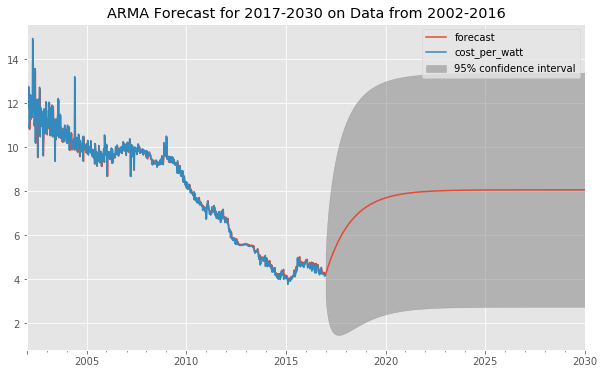

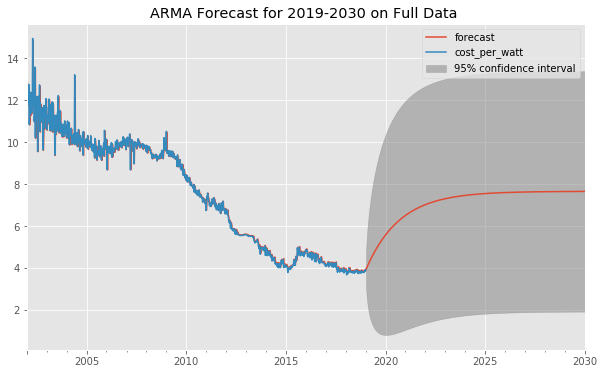

ARMA Condfidence Intervals                             0         1
const                5.320956  9.994639
ar.L1.cost_per_watt  0.978574  0.998817


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          cost_per_watt   No. Observations:                  888
Model:                     ARMA(1, 0)   Log Likelihood                -530.658
Method:                       css-mle   S.D. of innovations              0.439
Date:                Fri, 20 Mar 2020   AIC                           1067.315
Time:                        17:20:13   BIC                           1081.682
Sample:                    01-06-2002   HQIC                          1072.807
                         - 01-06-2019                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.6578      1.192      6.423      0.000       5.321       9.995
ar.L1.cost_per_watt     0.9887      0.005    191.454      0.000       0.979       0.999
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0114           +0.0000j            1.0114            0.0000
-----------------------------------------------------------------------------
"""

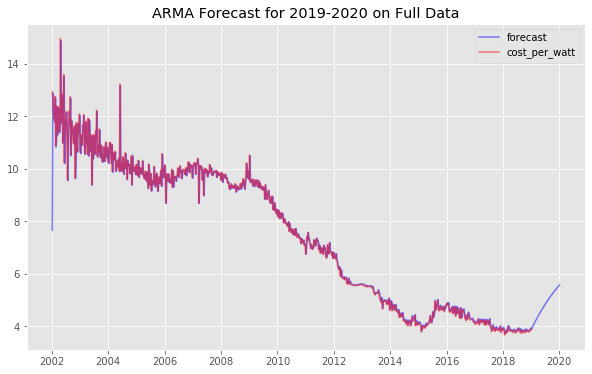

In [50]:
#ARMA ON FULL DATA

first_14 = y.loc[y.index.year <2017]
last_few = y.loc[y.index.year >2016]

mod = ARMA(first_14, order=(1,0), freq='W', )
res = mod.fit()
res.plot_predict(end='2030')
plt.title('ARMA Forecast for 2017-2030 on Data from 2002-2016')
plt.show()

mod = ARMA(y, order=(1,0), freq='W', )
res = mod.fit()
res.plot_predict(end='2030')
plt.title('ARMA Forecast for 2019-2030 on Full Data ')
plt.show()

plt.plot(res.predict(end='2020'), alpha=0.5, color='blue', label='forecast')
plt.plot(y, color='red', alpha=0.5, label='cost_per_watt')
plt.title('ARMA Forecast for 2019-2020 on Full Data')
plt.legend()

print('ARMA Condfidence Intervals', res.conf_int())
res.summary()

In [ ]:
ols_model, ols_trend = lag_ols_model(y)[0], lag_ols_model(y)[1]
linear_model, linear_trend = linear_ols_model(y)[0], linear_ols_model(y)[1]
rf_model, rf_trend = randomforest_model(y)[0], randomforest_model(y)[1]
score_table(y, ols_model, linear_model, rf_model)

In [51]:
print('covariance matrix for ols model \n', ols_model.cov_params())
print('---------------------------')
print('covariance matrix for linear model \n', linear_model.cov_params())
print('---------------------------')
print('covariance matrix for robust linear model \n', rf_model.feature_importances_)

covariance matrix for ols model 
            Intercept      Lag1      Lag2      Lag3
Intercept   0.001208 -0.000045 -0.000048 -0.000049
Lag1       -0.000045  0.000937 -0.000472 -0.000458
Lag2       -0.000048 -0.000472  0.000950 -0.000472
Lag3       -0.000049 -0.000458 -0.000472  0.000935
---------------------------
covariance matrix for linear model 
           const            x1
const  0.002094 -3.534835e-06
x1    -0.000004  7.952384e-09
---------------------------
covariance matrix for robust linear model 
 [0. 1.]


In [ ]:
#ARMA PLOT
#Plot3
ts_diff = df[1:] #remove the NaN
first_14 = ts_diff.loc[ts_diff.index.year <2017]
last_few = ts_diff.loc[ts_diff.index.year >2016]
mod3 = ARMA(ts_diff, order=(1,0), freq='W', )
res3 = mod3.fit()
plt.plot(res3.predict(end='2020'), alpha=0.5, color='blue', label='forecast')
plt.plot(ts_diff, color='red', alpha=0.5, label='cost_per_watt')
plt.title('ARMA Forecast through 2020 on Full Data')
plt.legend()
plt.show()
print('Confidence Intervals for ARMA Forecast through 2020 on Full Data', res3.conf_int())
print(res3.summary())

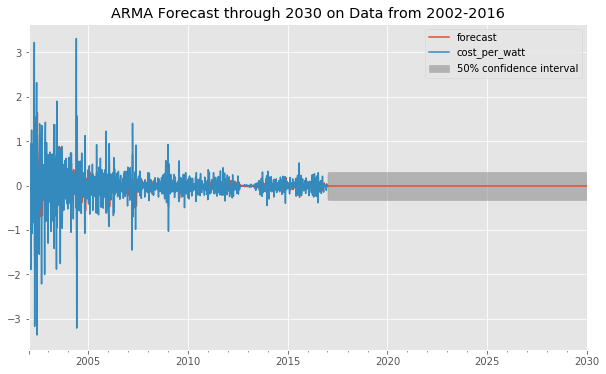

Confidence Intervals for ARMA Forecast through 2030 on Data from 2002-2016                             0         1
const               -0.030252  0.008003
ar.L1.cost_per_watt -0.553421 -0.431490
                              ARMA Model Results                              
Dep. Variable:          cost_per_watt   No. Observations:                  781
Model:                     ARMA(1, 0)   Log Likelihood                -406.005
Method:                       css-mle   S.D. of innovations              0.407
Date:                Fri, 20 Mar 2020   AIC                            818.011
Time:                        19:12:32   BIC                            831.993
Sample:                    01-13-2002   HQIC                           823.388
                         - 12-25-2016                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------

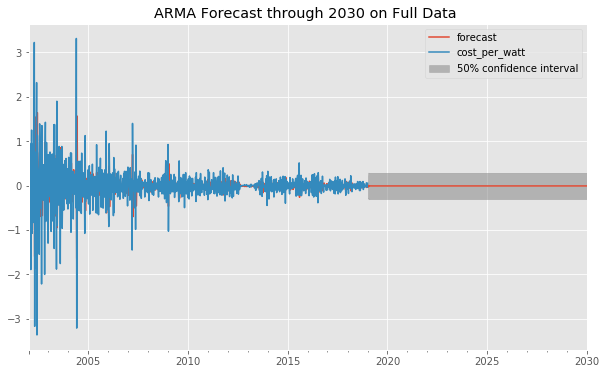

Confidence Intervals for ARMA Forecast through 2030 on Full Data                             0         1
const               -0.027008  0.006780
ar.L1.cost_per_watt -0.549122 -0.434644
                              ARMA Model Results                              
Dep. Variable:          cost_per_watt   No. Observations:                  887
Model:                     ARMA(1, 0)   Log Likelihood                -407.101
Method:                       css-mle   S.D. of innovations              0.383
Date:                Fri, 20 Mar 2020   AIC                            820.201
Time:                        19:12:32   BIC                            834.565
Sample:                    01-13-2002   HQIC                           825.692
                         - 01-06-2019                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const  

In [181]:
arma_res1, arma_res2 = ARMA_plots(diff)

In [ ]:

def ARMA_model(df, fcst_start, fcst_end):
    '''
    forecasts beginning from fcst_start through end of df
    fcst_start - date time string index from df entered in date time string format "YYYY-MM-DD"
    '''
    trunc_df = df[1:fcst]
    if fcst_end != df.index[-1]:
        new_dates = pd.DataFrame(pd.date_range(start=df.index[-1], end=fcst_end, freq='W'))
        new_dates['cost_per_watt'] = 0
        new_dates.set_index(0, drop=True, inplace=True)
        trunc_df = pd.concat([trunc_df, new_dates])
        continue
    else: 
        mod1 = ARMA(trunc_df, order=(1,0), freq='W', )
        res1 = mod1.fit()
        res.plot_predict(end=fcst_end)
        return res1

In [ ]:
def ARMA_model(df, fcst_start, fcst_end):
    '''
    fcst_start - date time string index from df entered in date time string format "YYYY-MM-DD"
    fcst_end - end of df entered in date time string format "YYYY-MM-DD"
    '''
    trunc_df = diff.loc[diff.index.year < begin_year] 
    act_cst = diff[len(trunc_df):]

    
    
    trunc_df = df[1:fcst_start]
    if fcst_end == df.index[-1]:
        mod1 = ARMA(trunc_df, order=(1,0), freq='W', )
        res1 = mod1.fit()
        res.plot_predict(end=fcst_end)
        return res1
    else:   
        new_dates = pd.DataFrame(pd.date_range(start=df.index[-1], end=fcst_end, freq='W'))
        new_dates['cost_per_watt'] = 0
        new_dates.set_index(0, drop=True, inplace=True)
        trunc_df = pd.concat([trunc_df, new_dates])    
        
 
        

In [225]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
# def evaluate_arima_model(X, arima_order):
#     # prepare training dataset
#     train_size = int(len(X) * 0.66)
#     train, test = X[0:train_size], X[train_size:]
#     history = [x for x in train]
#     # make predictions
#     predictions = list()
#     for t in range(len(test)):
#         model = ARIMA(history, order=arima_order)
#         model_fit = model.fit(disp=0)
#         yhat = model_fit.forecast()[0]
#         predictions.append(yhat)
#         history.append(test[t])
#     # calculate out of sample error
#     error = mean_squared_error(test, predictions)
#     return error

# def evaluate_models(dataset, p_values, d_values, q_values):
#     best_score, best_cfg = float("inf"), None
#     for p in p_values:
#         for d in d_values:
#             for q in q_values:
#                 order = (p,d,q)
#                 try:
#                     mse = evaluate_arima_model(dataset, order)
#                     if mse < best_score:
#                         best_score, best_cfg = mse, order
#                     print('ARIMA%s MSE=%.3f' % (order,mse))
#                 except:
#                     continue
#     print('Best ARIMA %s MSE=%.3f' % (best_cfg, best_score))

# p_values = [0, 1, 2, 4, 6, 8, 10]
# d_values = range(0, 3)
# q_values = range(0, 3)
# warnings.filterwarnings("ignore")
# evaluate_models(diff[1:].values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=0.015
ARIMA(0, 0, 1) MSE=0.018
ARIMA(0, 0, 2) MSE=0.018
ARIMA(0, 1, 0) MSE=0.043
ARIMA(0, 1, 1) MSE=0.015
ARIMA(0, 1, 2) MSE=0.017
ARIMA(0, 2, 0) MSE=0.139
ARIMA(0, 2, 1) MSE=0.043
ARIMA(0, 2, 2) MSE=0.016
ARIMA(1, 0, 0) MSE=0.013
ARIMA(1, 0, 1) MSE=0.018
ARIMA(1, 0, 2) MSE=0.018
ARIMA(1, 1, 0) MSE=0.027
ARIMA(1, 2, 0) MSE=0.067
ARIMA(2, 0, 0) MSE=0.013
ARIMA(2, 0, 1) MSE=0.017
ARIMA(2, 0, 2) MSE=0.017
ARIMA(2, 1, 0) MSE=0.021
ARIMA(2, 2, 0) MSE=0.045
ARIMA(4, 0, 0) MSE=0.013
ARIMA(4, 2, 0) MSE=0.031
ARIMA(6, 0, 1) MSE=0.018


<function matplotlib.pyplot.show(*args, **kw)>

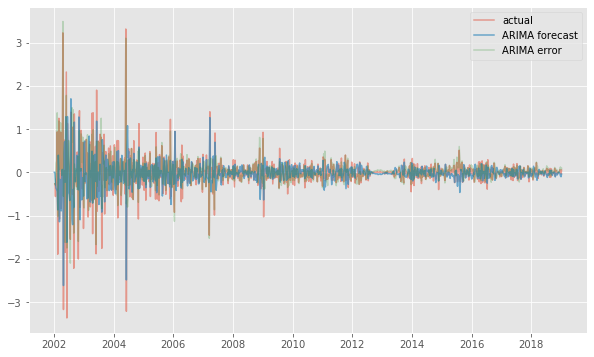

In [52]:
arima_forecast = pd.DataFrame(ARIMA(diff, order=(4,1,1), missing='drop', dates=diff.index.date, freq='W',).fit().predict())
arima_diff = diff.copy()
arima_diff['arima_preds'] = arima_forecast
arima_diff['error'] = arima_diff['cost_per_watt'] - arima_diff['arima_preds']
plt.plot(diff, alpha=0.5, label= 'actual')
plt.plot(arima_forecast, label='ARIMA forecast', alpha=0.7)
plt.plot(arima_diff['error'], label='ARIMA error', alpha=0.2, color='green')
plt.legend(loc='best')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

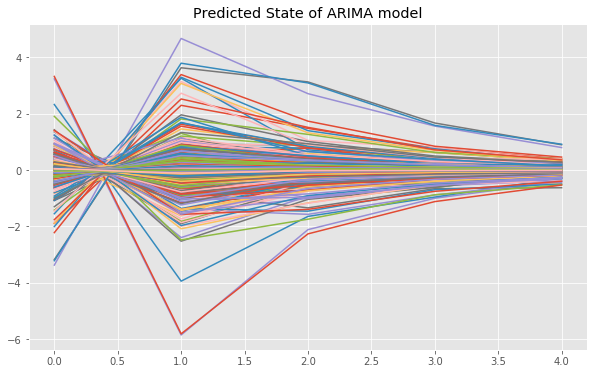

In [53]:
plt.plot(ARIMA(diff, order=(4,1,1), missing='drop', dates=diff.index.date, freq='W',).fit().predicted_state)
plt.title('Predicted State of ARIMA model')
plt.show

In [54]:
ARIMA_MSEs = pd.DataFrame()
ARIMA_MSEs['ARIMA Order[4,0,3]'] = [0.18641189046776047, 0.10443746417508153, 0.32316785758345695]
ARIMA_MSEs['ARIMA Order[4,1,1]'] = [0.186137263786611, 0.11835326053615955, 0.3440250870738347]
ARIMA_MSEs['ARIMA Order[5,1,4]'] = [0.18642433947045156, 0.10909224539847182, 0.330291152467746]
ARIMA_MSEs['ARIMA Order[7,0,1]'] = [0.18565332426281034, 0.10407455903428799, 0.3226058880961226]
ARIMA_MSEs['ARIMA Order[8,0,1]'] = [0.18547858053559843, 0.1039336771654681, 0.3223874643429364]
ARIMA_MSEs['ARIMA Order[15,1,1]']= [0.1863575756707153, 0.10422192313237938, 0.3241894823703004]
ARIMA_MSEs = ARIMA_MSEs.T
ARIMA_MSEs.rename(columns={0:'MAE', 1:'MSE',2:'RMSE'}, inplace=True)
diff_reg_scores = (stat_score_table(diff, tsols_model, tslinear_model, tsrf_model).T).rename(columns={'OLS':'OLS_diff', 'LINEAR':'LINEAR_diff','RF':'RF_diff'})
diff_reg_scores = diff_reg_scores.T
reg_scores = score_table(y, ols_model, linear_model, rf_model)
scores_for_all = pd.concat([reg_scores, diff_reg_scores])
all_s = pd.concat([scores_for_all, ARIMA_MSEs])
all_s

MAE       MSE      RMSE
OLS                  0.189762  0.120843  0.347625
LINEAR               0.555970  0.555970  0.745634
RF                   0.072495  0.019823  0.140796
OLS_diff             0.184800  0.115255  0.339493
LINEAR_diff          0.227956  0.227956  0.477447
RF_diff              0.126722  0.061356  0.247701
ARIMA Order[4,0,3]   0.186412  0.104437  0.323168
ARIMA Order[4,1,1]   0.186137  0.118353  0.344025
ARIMA Order[5,1,4]   0.186424  0.109092  0.330291
ARIMA Order[7,0,1]   0.185653  0.104075  0.322606
ARIMA Order[8,0,1]   0.185479  0.103934  0.322387
ARIMA Order[15,1,1]  0.186358  0.104222  0.324189

In [55]:
print('ARMA Order[1,0] MSE=', mean_squared_error(diff.dropna(),ARMA(diff.dropna(), order=(1,0)).fit().predict()))
print('ARMA Order[4,0] MSE=', mean_squared_error(diff.dropna(),ARMA(diff.dropna(), order=(4,0)).fit().predict() ))
print('ARMA Order[4,1] MSE=', mean_squared_error(diff.dropna(),ARMA(diff.dropna(), order=(4,1)).fit().predict() ))
print('ARMA Order[5,1] MSE=', mean_squared_error(diff.dropna(),ARMA(diff.dropna(), order=(5,1)).fit().predict() ))
print('ARMA Order[7,0] MSE=', mean_squared_error(diff.dropna(),ARMA(diff.dropna(), order=(7,0)).fit().predict() ))
print('ARMA Order[8,0] MSE=', mean_squared_error(diff.dropna(),ARMA(diff.dropna(), order=(8,0)).fit().predict() ))
print('ARMA Order[15,1] MSE=', mean_squared_error(diff.dropna(),ARMA(diff.dropna(), order=(15,1)).fit().predict() ))
print('=============')
print('ARIMA Order[4,0,3] MSE = {}'.format(mean_squared_error(diff[1:], pd.DataFrame(ARIMA(diff, order=(4,0,3)).fit().forecasts).T[1:])))
print('ARIMA Order[4,1,1] MSE = {}'.format(mean_squared_error(diff[1:], pd.DataFrame(ARIMA(diff, order=(4,1,1)).fit().forecasts).T[1:])))
print('ARIMA Order[5,1,4] MSE = {}'.format(mean_squared_error(diff[1:], pd.DataFrame(ARIMA(diff, order=(5,1,4)).fit().forecasts).T[1:])))
print('ARIMA Order[7,0,1] MSE = {}'.format(mean_squared_error(diff[1:], pd.DataFrame(ARIMA(diff, order=(7,0,1)).fit().forecasts).T[1:])))
print('ARIMA Order[8,0,1] MSE = {}'.format(mean_squared_error(diff[1:], pd.DataFrame(ARIMA(diff, order=(8,0,1)).fit().forecasts).T[1:])))
print('ARIMA Order[15,1,1] MSE = {}'.format(mean_squared_error(diff[1:], pd.DataFrame(ARIMA(diff, order=(15,1,1)).fit().forecasts).T[1:])))

ARMA Order[1,0] MSE= 0.146586257398789
ARMA Order[4,0] MSE= 0.1136606870368262
ARMA Order[4,1] MSE= 0.10782929156125641
ARMA Order[5,1] MSE= 0.1063737838582819
ARMA Order[7,0] MSE= 0.1060237769976894
ARMA Order[8,0] MSE= 0.10587430816678502
ARMA Order[15,1] MSE= 0.10009314946409816
ARIMA Order[4,0,3] MSE = 0.10443746417508153
ARIMA Order[4,1,1] MSE = 0.11835326053615955
ARIMA Order[5,1,4] MSE = 0.10909224539847182
ARIMA Order[7,0,1] MSE = 0.10407455903428799
ARIMA Order[8,0,1] MSE = 0.1039336771654681
ARIMA Order[15,1,1] MSE = 0.10509882047952329


In [57]:
diff_reg_scores = (stat_score_table(diff, tsols_model, tslinear_model, tsrf_model).T).rename(columns={'OLS':'OLS_diff', 'LINEAR':'LINEAR_diff','RF':'RF_diff'})
diff_reg_scores = diff_reg_scores.T
reg_scores = score_table(y, ols_model, linear_model, rf_model)
scores_for_all = pd.concat([reg_scores, diff_reg_scores])
model_mses = scores_for_all[['MSE']].T
model_mses['ARMA Order[8,0]']= mean_squared_error(diff.dropna(),ARMA(diff.dropna(), order=(8,0)).fit().predict())
model_mses['ARMA Order[15,1]']= mean_squared_error(diff.dropna(),ARMA(diff.dropna(), order=(15,1)).fit().predict())
model_mses['ARIMA Order[4,0,3]']= mean_squared_error(diff[1:], pd.DataFrame(ARIMA(diff, order=(4,0,3)).fit().forecasts).T[1:])
model_mses['ARIMA Order[7,0,1]'] =mean_squared_error(diff[1:], pd.DataFrame(ARIMA(diff, order=(7,0,1)).fit().forecasts).T[1:])
model_mses['ARIMA Order[8,0,1]'] =mean_squared_error(diff[1:], pd.DataFrame(ARIMA(diff, order=(8,0,1)).fit().forecasts).T[1:])
model_mses.T
model_mses.sort_values(by='MSE')

KeyError: 'MSE'

In [60]:
ts_df = diff[1:]

In [67]:
52*3

156

731

cost_per_watt
installation_date               
2016-01-17                 -0.08
2016-01-24                  0.07
2016-01-31                 -0.23
2016-02-07                 -0.10
2016-02-14                  0.01
...                          ...
2018-12-09                  0.01
2018-12-16                  0.06
2018-12-23                  0.04
2018-12-30                 -0.04
2019-01-06                  0.05

[156 rows x 1 columns]

In [85]:
y_hat.index[0]

Timestamp('2002-01-13 00:00:00', freq='W-SUN')

In [86]:
actual = ts_df[len(ts_df) - (52*3):]

In [89]:
actual.index[-1]

Timestamp('2019-01-06 00:00:00', freq='W-SUN')

In [78]:
ts_df[len(ts_df) - (52*3):]

cost_per_watt
installation_date               
2016-01-17                 -0.08
2016-01-24                  0.07
2016-01-31                 -0.23
2016-02-07                 -0.10
2016-02-14                  0.01
...                          ...
2018-12-09                  0.01
2018-12-16                  0.06
2018-12-23                  0.04
2018-12-30                 -0.04
2019-01-06                  0.05

[156 rows x 1 columns]

In [70]:
y_hat = ts_df[:len(ts_df) - (52*3)]

In [175]:
print("y_hat's timeframe  : ", str(y_hat.index.date[[0,-1]]))
print("actual's timeframe :", str(actual.index.date[[0,-1]]))

y_hat's timeframe  :  [datetime.date(2002, 1, 13) datetime.date(2016, 1, 10)]
actual's timeframe : [datetime.date(2016, 1, 17) datetime.date(2019, 1, 6)]


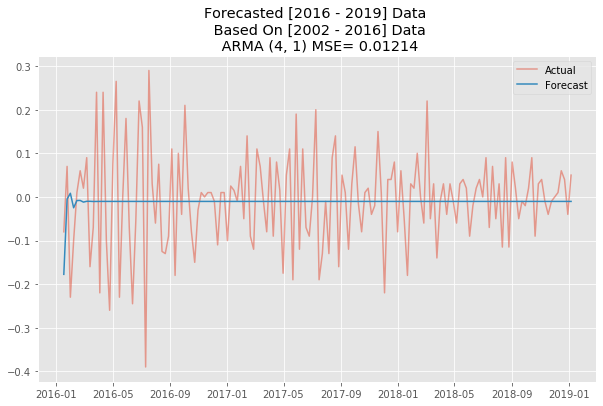

In [179]:
order= (4,1)
ts_df = diff.dropna()
#removing the last three years of observations as hold out for forecasting
y_hat = ts_df[:len(ts_df) - (52*3)]
actual = ts_df[len(ts_df) - (52*3):]
arma_pred = ARMA(y_hat, order=order, freq='W').fit().predict(start=actual.index.date[0], end=actual.index.date[-1])

actual_date_s, actual_date_e = actual.index.year[0], actual.index.year[-1]
forcst_date_s, forcst_date_e = y_hat.index.year[0], y_hat.index.year[-1]

plt.plot(actual, label='Actual', alpha=0.5)
plt.plot(arma_pred, label= 'Forecast')
plt.legend(loc='best')
plt.title('Forecasted [{} - {}] Data \n Based On [{} - {}] Data\n ARMA {} MSE= {}'.format(
                            actual_date_s, actual_date_e, 
                            forcst_date_s, forcst_date_e,order,
                            round(mean_squared_error(actual, arma_pred),5)))
plt.show()




In [154]:


str(actual.index.date[0])[:7]


'2016-01'

In [128]:
diff.index[0].month_name()

'January'

In [ ]:
actual_date_s = actual.index.month_name()[0] +' '+ str(actual.index.year[0])
actual_date_e = actual.index.month_name()[-1] +' '+ str(actual.index.year[-1])
forcst_date_s = y_hat.index.month_name()[0] + ' ' + str(y_hat.index.year[0])
forcst_date_e = y_hat.index.month_name()[-1] + ' ' + str(y_hat.index.year[-1])